In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
fear = pd.read_csv("/content/fear_greed_index.csv")
trades = pd.read_csv("/content/historical_data.csv")


In [3]:
fear.head(), trades.head()


(    timestamp  value classification        date
 0  1517463000     30           Fear  2018-02-01
 1  1517549400     15   Extreme Fear  2018-02-02
 2  1517635800     40           Fear  2018-02-03
 3  1517722200     24   Extreme Fear  2018-02-04
 4  1517808600     11   Extreme Fear  2018-02-05,
                                       Account  Coin  Execution Price  \
 0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
 1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
 2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
 3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
 4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   
 
    Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
 0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
 1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
 2       144.09   1150.63  BUY 

In [4]:
cols_to_drop = [col for col in trades.columns if col in
                ["date_x", "date_y", "date_IST", "Timestamp_IST"]
                or col.endswith("_IST")]

trades = trades.drop(columns=cols_to_drop, errors="ignore")


In [5]:
trades["Timestamp IST"] = pd.to_datetime(
    trades["Timestamp IST"],
    format="%d-%m-%Y %H:%M",
    errors="coerce"
)


In [6]:
trades["trade_date"] = trades["Timestamp IST"].dt.normalize()


In [7]:
fear["date"] = pd.to_datetime(fear["date"], errors="coerce")


In [8]:
fear = fear.rename(columns={"classification": "sentiment"})


In [9]:
merged = trades.merge(
    fear[["date", "sentiment"]],
    left_on="trade_date",
    right_on="date",
    how="left"
)


In [10]:
merged = merged.drop(columns=["date"], errors="ignore")


In [11]:
merged["sentiment"].value_counts(dropna=False)


,count
sentiment,
Fear,58286
Greed,47621
Extreme Greed,38411
Neutral,36550
Extreme Fear,19639
NaN,6


In [12]:
merged.groupby("sentiment")["Closed PnL"].describe()


,count,mean,std,min,25%,50%,75%,max
sentiment,,,,,,,,
Extreme Fear,19639.0,32.959157,1136.655487,-31036.69194,0.0,0.0,5.102009,115287.00000
Extreme Greed,38411.0,68.829364,777.821204,-10259.46800,0.0,0.0,10.056957,44223.45187
Fear,58286.0,54.028019,928.808526,-19841.24014,0.0,0.0,5.525516,135329.09010
Greed,47621.0,35.825399,1050.460576,-117990.10410,0.0,0.0,4.868847,71535.71674
Neutral,36550.0,38.365570,491.761582,-18993.46842,0.0,0.0,4.365746,48504.09555


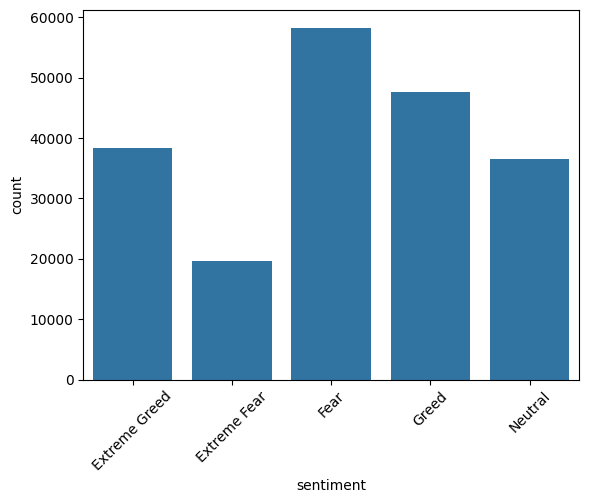

In [13]:
sns.countplot(data=merged, x="sentiment")
plt.xticks(rotation=45)
plt.show()
